In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [53]:
data = pd.read_csv('기온.csv',engine='python')
# csv 파일명 이름이 한글이면 engine='python'을 붙여줘야 오류가 나지 않음

In [54]:
data.head()

,지점,일시,평균,최고,최저
0,90,1968-01-01,-0.7,11.4,-11.4
1,90,1968-02-01,-2.1,9.7,-9.9
2,90,1968-03-01,5.9,20.5,-3.2
3,90,1968-04-01,10.5,21.4,4.0
4,90,1968-05-01,14.6,24.5,9.3


In [55]:
len(data)

45555

In [56]:
area = pd.read_csv('지점정보.csv',engine='python')

In [57]:
area.head()

,지점,지점명,위도,경도
0,3,선봉,42.3167,130.4000
1,5,삼지연,41.8167,128.3167
2,8,청진,41.7833,129.8167
3,14,중강,41.7833,126.8833
4,16,혜산,41.4000,128.1667


In [58]:
len(area)

4272

In [24]:
# .duplicated : 중복값 확인
# True : 중복, False : 중복 x
data['지점'].duplicated()

0        False
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
45525     True
45526     True
45527     True
45528     True
45529     True
45530     True
45531     True
45532     True
45533     True
45534     True
45535     True
45536     True
45537     True
45538     True
45539     True
45540     True
45541     True
45542     True
45543     True
45544     True
45545     True
45546     True
45547     True
45548     True
45549     True
45550     True
45551     True
45552     True
45553     True
45554     True
Name: 지점, Length: 45555, dtype: bool

In [25]:
# .drop_duplicates : 중복값 삭제
## tolist : 리스트로 만들어줌
df_area = data['지점'].drop_duplicates().tolist()

In [26]:
len(df_area)

102

In [28]:
# int : 숫자
area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4272 entries, 0 to 4271
Data columns (total 4 columns):
지점     4272 non-null int64
지점명    4272 non-null object
위도     4247 non-null float64
경도     4247 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 133.6+ KB


In [31]:
area_ = area[area['지점'] == 90]
area_

,지점,지점명,위도,경도
27,90,속초,38.2509,128.5647


In [32]:
area2 = area[area['지점'].isin(df_area)]
area2

,지점,지점명,위도,경도
27,90,속초,38.2509,128.5647
29,93,북춘천,37.9475,127.7547
30,93,북춘천,37.9474,127.7544
32,95,철원,38.1479,127.3042
34,98,동두천,37.9019,127.0607
35,99,파주,37.8859,126.7665
36,99,문산,37.8859,126.7665
37,100,대관령,37.6771,128.7183
38,100,대관령,37.6869,128.7587
39,101,춘천,37.9026,127.7357


In [37]:
# 중복데이터가 뭔지 확인

old = 0
dropls = []

for item in area2.index :
    if old == area2.loc[item,'지점'] :
        dropls.append(item)
    old = area2.loc[item,'지점']
    
dropls

# area2.loc[item,'지점'] = area2['지점'][item]

[30,
 36,
 38,
 41,
 42,
 49,
 53,
 55,
 56,
 68,
 70,
 74,
 76,
 77,
 81,
 84,
 85,
 87,
 88,
 106,
 112,
 114,
 116,
 131,
 132,
 139,
 141,
 142,
 145,
 146,
 151,
 153,
 160,
 165,
 172,
 178]

In [38]:
area2 = area2.drop(dropls,0)
len(area2)

102

In [59]:
area3 = area[area['지점'].isin(df_area)]
area3

,지점,지점명,위도,경도
27,90,속초,38.2509,128.5647
29,93,북춘천,37.9475,127.7547
30,93,북춘천,37.9474,127.7544
32,95,철원,38.1479,127.3042
34,98,동두천,37.9019,127.0607
35,99,파주,37.8859,126.7665
36,99,문산,37.8859,126.7665
37,100,대관령,37.6771,128.7183
38,100,대관령,37.6869,128.7587
39,101,춘천,37.9026,127.7357


In [60]:
area3['지점'].duplicated()  # 시리즈로 출력됨

27     False
29     False
30      True
32     False
34     False
35     False
36      True
37     False
38      True
39     False
40     False
41      True
42      True
43     False
44     False
45     False
46     False
48     False
49      True
51     False
52     False
53      True
54     False
55      True
56      True
57     False
58     False
59     False
60     False
61     False
       ...  
154    False
155    False
156    False
157    False
158    False
159    False
160     True
161    False
162    False
163    False
164    False
165     True
166    False
167    False
168    False
169    False
170    False
171    False
172     True
173    False
174    False
175    False
176    False
177    False
178     True
179    False
180    False
181    False
182    False
183    False
Name: 지점, Length: 138, dtype: bool

In [61]:
df_area3 = pd.DataFrame(area3['지점'].duplicated())  # 데이터프레임으로 만들어줌
df_area3.head()

,지점
27,False
29,False
30,True
32,False
34,False


In [62]:
df_area3 = df_area3.rename(columns={'지점':'중복'})
df_area3.head()

,중복
27,False
29,False
30,True
32,False
34,False


In [63]:
area3 = pd.concat([area3, df_area3],axis=1)
area3.head()

,지점,지점명,위도,경도,중복
27,90,속초,38.2509,128.5647,False
29,93,북춘천,37.9475,127.7547,False
30,93,북춘천,37.9474,127.7544,True
32,95,철원,38.1479,127.3042,False
34,98,동두천,37.9019,127.0607,False


In [64]:
area4 = area3[area3['중복']==False]
len(area4)

102

In [65]:
area4 = area4.drop('중복',axis=1)
area4.head()

,지점,지점명,위도,경도
27,90,속초,38.2509,128.5647
29,93,북춘천,37.9475,127.7547
32,95,철원,38.1479,127.3042
34,98,동두천,37.9019,127.0607
35,99,파주,37.8859,126.7665


In [66]:
df = pd.merge(data,area4,on='지점',how='inner')
# inner : 지점이 같은 것만 합치겠다는 뜻

In [69]:
df.head()

,지점,일시,평균,최고,최저,지점명,위도,경도
0,90,1968-01-01,-0.7,11.4,-11.4,속초,38.2509,128.5647
1,90,1968-02-01,-2.1,9.7,-9.9,속초,38.2509,128.5647
2,90,1968-03-01,5.9,20.5,-3.2,속초,38.2509,128.5647
3,90,1968-04-01,10.5,21.4,4.0,속초,38.2509,128.5647
4,90,1968-05-01,14.6,24.5,9.3,속초,38.2509,128.5647


In [68]:
len(df)

45555

In [70]:
df['일시'] = pd.to_datetime(df['일시'])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45555 entries, 0 to 45554
Data columns (total 8 columns):
지점     45555 non-null int64
일시     45555 non-null datetime64[ns]
평균     45093 non-null float64
최고     45554 non-null float64
최저     45551 non-null float64
지점명    45555 non-null object
위도     45555 non-null float64
경도     45555 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 3.1+ MB


In [78]:
df['년도']=df['일시'].dt.year

In [79]:
df.head()

,지점,일시,평균,최고,최저,지점명,위도,경도,년도,월
0,90,1968-01-01,-0.7,11.4,-11.4,속초,38.2509,128.5647,1968,1
1,90,1968-02-01,-2.1,9.7,-9.9,속초,38.2509,128.5647,1968,2
2,90,1968-03-01,5.9,20.5,-3.2,속초,38.2509,128.5647,1968,3
3,90,1968-04-01,10.5,21.4,4.0,속초,38.2509,128.5647,1968,4
4,90,1968-05-01,14.6,24.5,9.3,속초,38.2509,128.5647,1968,5


In [80]:
df['월']=df['일시'].dt.month

In [81]:
df.head()

,지점,일시,평균,최고,최저,지점명,위도,경도,년도,월
0,90,1968-01-01,-0.7,11.4,-11.4,속초,38.2509,128.5647,1968,1
1,90,1968-02-01,-2.1,9.7,-9.9,속초,38.2509,128.5647,1968,2
2,90,1968-03-01,5.9,20.5,-3.2,속초,38.2509,128.5647,1968,3
3,90,1968-04-01,10.5,21.4,4.0,속초,38.2509,128.5647,1968,4
4,90,1968-05-01,14.6,24.5,9.3,속초,38.2509,128.5647,1968,5


In [82]:
df_8 = df[df['월']==8]

In [91]:
len(df_8)

3760

In [92]:
df_8.head()

,지점,일시,평균,최고,최저,지점명,위도,경도,년도,월
7,90,1968-08-01,23.3,31.9,16.6,속초,38.2509,128.5647,1968,8
19,90,1969-08-01,24.8,33.8,18.6,속초,38.2509,128.5647,1969,8
31,90,1970-08-01,23.4,32.4,19.2,속초,38.2509,128.5647,1970,8
43,90,1971-08-01,22.6,35.4,16.8,속초,38.2509,128.5647,1971,8
55,90,1972-08-01,23.7,34.2,16.8,속초,38.2509,128.5647,1972,8


In [111]:
df_8g = df_8.groupby(['지점명','년도'])['평균','최고','최저'].mean()

In [112]:
df_8g.head()
# 지점명의 년도가 key 가 됨

평균    최고    최저
지점명 년도                    
강릉  1960  25.2  34.8  17.9
    1961  25.4  34.9  17.0
    1962  25.0  35.1  18.6
    1963  24.6  32.4  18.2
    1964  25.6  35.3  19.7

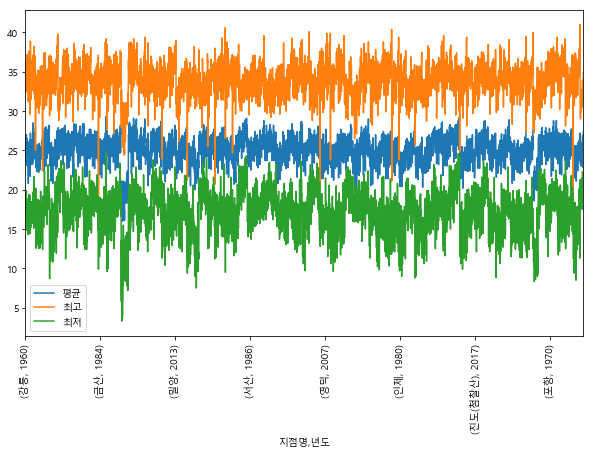

In [116]:
df_8g.plot(figsize=(10,6))
plt.xticks(rotation=90)
plt.show()

In [117]:
df_ = df[df['년도'] > 2000 and df['월']==8]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().